In [1]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


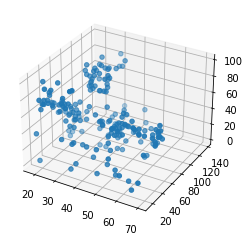

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
new_array=df.values[:,2:5]
new_array = np.array(new_array, dtype=np.float)
ax.scatter(new_array[:,0],new_array[:,1],new_array[:,2])

In [6]:
import numpy as np
from scipy.spatial import distance
#====================
#INITIAL MEANS
#===================
c=[]

# ------------------------
# RANDOMLY SELECT 1ST MEAN
# ------------------------
rows = new_array.shape[0]
temp = np.random.randint(1,rows+1) # random integer from uniform dist, range [0,rows+1)
c.append(new_array[temp]) # SET 1ST CENTRE RANDOMLY FROM DATASET

    
# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "2ND" MEAN
# --------------------------------------------

# compute distance squared from 1st centre
D2=[]
for i in range(rows):
    d=distance.euclidean(c[0],new_array[i])
    D2.append(d*d)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)

# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val
    
p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break
        
c.append(new_array[index]) # SET 2ND MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "3RD" MEAN
# --------------------------------------------

# compute shortest distance squared (from both centres)
D2=[]
for i in range(rows):
    d1=distance.euclidean(c[0],new_array[i])
    d2=distance.euclidean(c[1],new_array[i])
    if d1*d1 >= d2*d2:
        D2.append(d2*d2)
    if d2*d2 > d1*d1:
        D2.append(d1*d1)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)
    
# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val
    
p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break
        
c.append(new_array[index]) # SET 3RD MEAN

In [16]:
# WE NOW HAVE 3 MEANS SELECTED VIA CAREFUL SEEDING
c=np.asarray(c, dtype = np.float)

c

array([[27., 88., 69.],
       [46., 98., 15.],
       [49., 62., 56.]])

In [20]:
# NOW PROCEEDING WITH K-MEANS
# WITH THESE 3 MEANS AS THE INITIAL CENTRES
from copy import deepcopy

c_old = (3,3)
c_old = np.zeros(c_old)

clusters = np.zeros(rows) # Cluster Lables(0, 1, 2)

error=np.linalg.norm(c-c_old,axis=1) # Error variable for euclidean distance between new centroids and old centroids

# Loop will run till the error becomes zero
while (error != 0).all():
    # Assigning each value to its closest cluster
    for i in range(rows):
        distances = np.linalg.norm(new_array[i]-c,axis=1) #computes dist of an object with each cluster centre
        cluster = np.argmin(distances) #returns the index containing the min dist in "distances"
        clusters[i] = cluster #assigns cluster label
    # Storing the old centroid values
    c_old = deepcopy(c)
    # Finding the new centroids by taking the average value
    for i in range(3): #range(3) since there are 3 clusters
        points = [new_array[j] for j in range(rows) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    error = np.linalg.norm(c-c_old, axis=1)

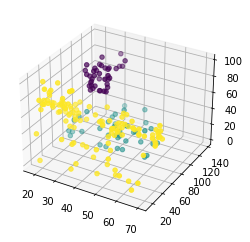

In [21]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.scatter(new_array[:,0],new_array[:,1],new_array[:,2], c=clusters.astype(np.float))